Solve question 2.15 (use https://www.stata.com/data/s4poe4/cps4_small.dta and solve up to part c) in HGL.

How much does education affect wage rates? The data file cps4_small.dat contains 1000 observations on hourly wage rates, education, and other variables from the 2008 Current Population Survey (CPS).

a. Obtain the summary statistics and histograms for the variables WAGE and EDUC. Discuss the data characteristics.

In [12]:
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        wage |      1,000    20.61566    12.83472       1.97      76.39
        educ |      1,000      13.799    2.711079          0         21
       exper |      1,000      26.508    12.85446          2         65
       hrswk |      1,000      39.952     10.3353          0         90
     married |      1,000        .581    .4936423          0          1
-------------+---------------------------------------------------------
      female |      1,000        .514    .5000541          0          1
       metro |      1,000         .78    .4144536          0          1
     midwest |      1,000         .24    .4272968          0          1
       south |      1,000        .296    .4567194          0          1
        west |      1,000         .24    .4272968          0          1
-------------+-------------------------------------------------





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        wage |      1,000    20.61566    12.83472       1.97      76.39
        educ |      1,000      13.799    2.711079          0         21

(bin=29, start=1.97, width=2.5662069)


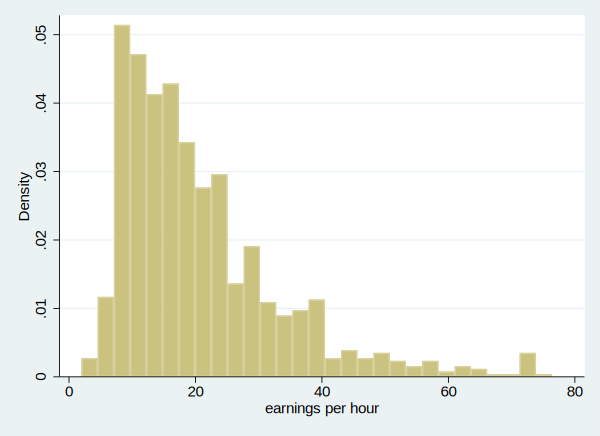




(bin=29, start=0, width=.72413793)


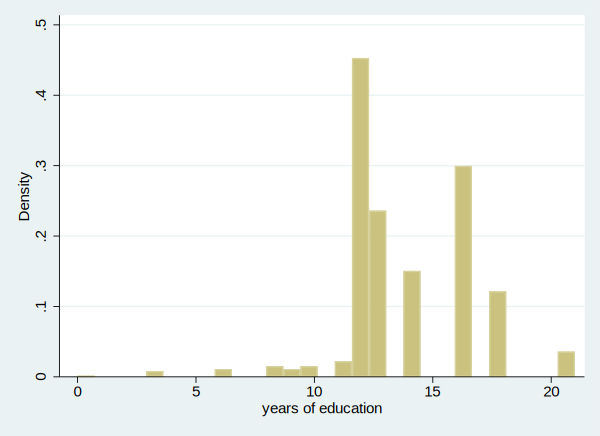

In [7]:
clear all

use cps4_small.dta

summarize wage educ

histogram wage 

histogram educ

The data for wages is heavily right-skewed, with a mean of around 20. The years of education data, on the other hand, is quite left skewed, and is more platykurtic.

b. Estimate the linear regression $WAGE = \beta_1 + \beta_2 EDUC + \epsilon$ and discuss the results.

In [9]:
regress wage educ


      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(1, 998)       =    211.66
       Model |  28794.2878         1  28794.2878   Prob > F        =    0.0000
    Residual |   135771.14       998  136.043226   R-squared       =    0.1750
-------------+----------------------------------   Adj R-squared   =    0.1741
       Total |  164565.428       999  164.730158   Root MSE        =    11.664

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   1.980288   .1361174    14.55   0.000     1.713178    2.247397
       _cons |  -6.710328   1.914156    -3.51   0.000    -10.46656   -2.954096
------------------------------------------------------------------------------


We see that the linear regression is not very strong. According to the R-squared of 0.1741, only 17% in the variation in the wage variable can be explained by linear relationships with the education variable.

c. Calculate the least squares residuals and plot them against EDUC. Are any patterns evident? If assumptions SR1–SR5 hold, should any patterns be evident in the least squares residuals?

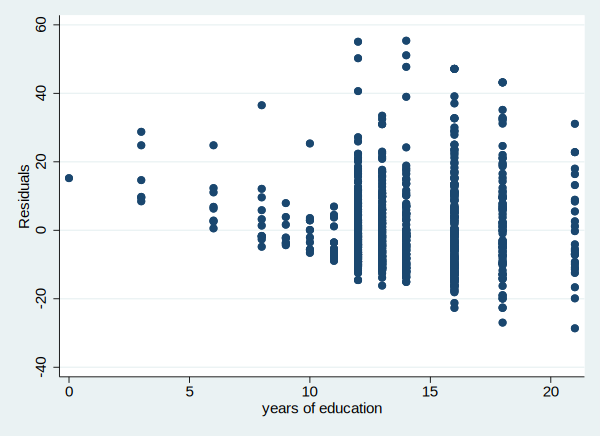

In [11]:
predict e, residuals

scatter e educ

There are some issues with the assumption of the homogeneity of variance. Clearly this assumption does not hold, as residuasl spread farther and farther out as years of education get higher. 

d. Estimate separate regressions for males, females, blacks, and whites. Compare the results.

In [14]:
regress wage educ if female == 0


      Source |       SS           df       MS      Number of obs   =       486
-------------+----------------------------------   F(1, 484)       =    106.82
       Model |  14241.1633         1  14241.1633   Prob > F        =    0.0000
    Residual |  64524.9629       484  133.316039   R-squared       =    0.1808
-------------+----------------------------------   Adj R-squared   =    0.1791
       Total |  78766.1262       485  162.404384   Root MSE        =    11.546

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |     1.8753   .1814426    10.34   0.000     1.518788    2.231813
       _cons |  -3.054487   2.493527    -1.22   0.221    -7.953963    1.844988
------------------------------------------------------------------------------


In [15]:
regress wage educ if female == 1


      Source |       SS           df       MS      Number of obs   =       514
-------------+----------------------------------   F(1, 512)       =    136.65
       Model |  17610.9284         1  17610.9284   Prob > F        =    0.0000
    Residual |   65984.275       512  128.875537   R-squared       =    0.2107
-------------+----------------------------------   Adj R-squared   =    0.2091
       Total |  83595.2034       513  162.953613   Root MSE        =    11.352

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   2.357519   .2016737    11.69   0.000     1.961309    2.753729
       _cons |  -14.16805   2.895697    -4.89   0.000    -19.85696   -8.479137
------------------------------------------------------------------------------


In [16]:
regress wage educ if black == 1


      Source |       SS           df       MS      Number of obs   =       112
-------------+----------------------------------   F(1, 110)       =     29.21
       Model |  3546.40943         1  3546.40943   Prob > F        =    0.0000
    Residual |  13354.3152       110  121.402866   R-squared       =    0.2098
-------------+----------------------------------   Adj R-squared   =    0.2027
       Total |  16900.7247       111  152.258781   Root MSE        =    11.018

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   2.449058   .4531261     5.40   0.000     1.551068    3.347047
       _cons |  -15.08593   6.169276    -2.45   0.016    -27.31198    -2.85987
------------------------------------------------------------------------------


In [17]:
regress wage educ if black == 0


      Source |       SS           df       MS      Number of obs   =       888
-------------+----------------------------------   F(1, 886)       =    181.49
       Model |  24932.6443         1  24932.6443   Prob > F        =    0.0000
    Residual |  121717.563       886   137.37874   R-squared       =    0.1700
-------------+----------------------------------   Adj R-squared   =    0.1691
       Total |  146650.208       887  165.332816   Root MSE        =    11.721

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   1.924307     .14284    13.47   0.000     1.643963    2.204651
       _cons |  -5.672216   2.016614    -2.81   0.005    -9.630113   -1.714319
------------------------------------------------------------------------------


Looks like for males, a linear regression with no intercept is best. For females, having an intercept helps. For blacks, an intercept is acceptable. For whites, the intercept is acceptable, but the overall regression is marginally lower than for other subsets.

e. Estimate the quadratic regression $WAGE = \alpha_1 + \alpha_2 EDUC^2 + e$ and discuss the results. Estimate the marginal effect of another year of education on wage for a person with 12 years of education, and for a person with 14 years of education. Compare these values to the estimated marginal effect of education from the linear regression in part (b).

In [21]:
gen edsq = educ^2

regress wage edsq


      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(1, 998)       =    231.33
       Model |  30967.2967         1  30967.2967   Prob > F        =    0.0000
    Residual |  133598.131       998  133.865863   R-squared       =    0.1882
-------------+----------------------------------   Adj R-squared   =    0.1874
       Total |  164565.428       999  164.730158   Root MSE        =     11.57

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        edsq |   .0734891   .0048318    15.21   0.000     .0640075    .0829706
       _cons |   6.082831   1.023161     5.95   0.000     4.075038    8.090624
------------------------------------------------------------------------------


These results are still not very impressive. 

The marginal effect is $$ \frac{dWAGE}{dEDUC} = 2 \alpha_2 EDUC = 2*0.0734891 * EDUC = 0.1469782 * EDUC = f(EDUC)$$

plugging in the numbers to obtain the marginal effect, we see  $$f(12) = 1.7637384, f(14) = 2.0576948$$

Thus the marginal effect changes as a function of the years of education already gone through, while in the linear regression in part b, the marginal effect is static.

In your own words, summarize the assumptions of a simple linear regression and their connection to the Gauss Markov Theorem.

The assumptions of a simple linear regression are:
1. linear relationship
2. no collinearity/mulitcollinearity
3. no autocorrelation
4. homoscedasticity
5. normally distributed errors

The Gauss Markov Theorem states that when all these assumptions are met, OLS in particular, rather than other linear regressions like L1, is the best linear unbiased estimator.

In a few sentences, explain how repeated samples can be used to show that an estimator is unbiased (refer to 2.4.3 in p. 59).

Repeated sampling can be shown that an estimator is unbiased by breaking down samples into smaller subsamples, calculating regression coefficients for each of the subsamples, and then averaging each of the regression coefficients. These should conform quite closely to the true parameter, despite each of the individual regression coefficients not necessarily being very accurate. This is a result of the law of large numbers.